<a href="https://colab.research.google.com/github/ropero98/TFM/blob/main/TFM_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Data_eq.csv")


In [ ]:
df= df.drop(columns=['Unnamed: 0'])



In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,30.67,1,1,0,0,0,0,0,8,0,1,1,3,8,0,0,1
1,No,24.41,1,0,0,30,0,1,0,8,0,1,1,1,9,0,0,0
2,No,20.36,0,0,0,0,0,0,1,0,0,1,1,4,8,0,0,0
3,No,25.82,1,0,0,0,10,0,0,0,3,1,1,2,7,0,0,0
4,No,25.84,0,0,0,0,30,0,0,9,0,1,1,3,7,0,0,0


In [ ]:
df['Target'] = df['HeartDisease'].map({'Yes':1,'No':0})

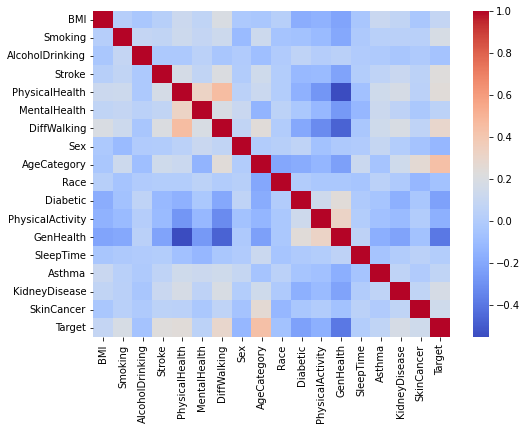

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm')

In [ ]:
#Observamos cual de las variables es la que tiene mayor corr con nuestra columna target
np.abs(df.corr()['Target']).sort_values().tail(17)

MentalHealth        0.047422
AlcoholDrinking     0.060281
Race                0.067648
Asthma              0.069088
BMI                 0.086368
Sex                 0.124671
SkinCancer          0.141267
PhysicalActivity    0.162186
KidneyDisease       0.180235
Smoking             0.185319
Diabetic            0.228676
Stroke              0.229921
PhysicalHealth      0.241416
DiffWalking         0.289851
GenHealth           0.395932
AgeCategory         0.437688
Target              1.000000
Name: Target, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X = df.drop(['Target','HeartDisease'],axis=1)
y = df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dftrain = pd.concat([X_train, y_train], axis=1)
dftest = pd.concat([X_test, y_test], axis=1)

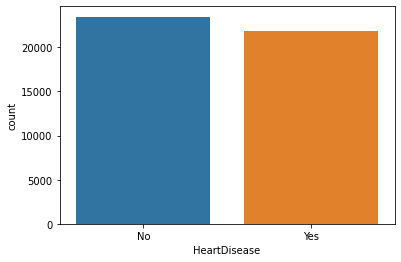

In [ ]:
sns.countplot(x='HeartDisease',data=dftrain)


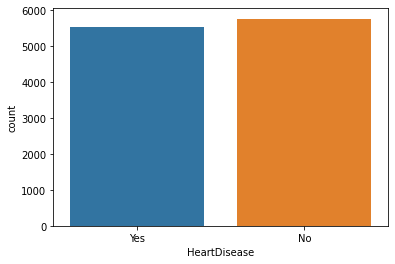

In [ ]:
sns.countplot(x='HeartDisease',data=dftest)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [ ]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_values = list(range(1,50))
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(n_neighbors=29),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 29,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=29))],
 'verbose': False}

Text(0, 0.5, 'Accuracy')

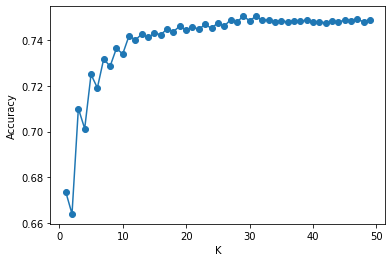

In [ ]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20,)
knn.fit(X_train,y_train)
k20= knn.predict(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=25,)
knn.fit(X_train,y_train)
k25= knn.predict(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=29,)
knn.fit(X_train,y_train)
k29= knn.predict(X_test)

In [ ]:
print('n_neighbors = 20',classification_report(y_test,k20))
print('n_neighbors = 25',classification_report(y_test,k25))
print('n_neighbors = 29',classification_report(y_test,k29))

n_neighbors = 20               precision    recall  f1-score   support

          No       0.74      0.75      0.75      5770
         Yes       0.74      0.73      0.73      5553

    accuracy                           0.74     11323
   macro avg       0.74      0.74      0.74     11323
weighted avg       0.74      0.74      0.74     11323

n_neighbors = 25               precision    recall  f1-score   support

          No       0.76      0.72      0.74      5770
         Yes       0.73      0.76      0.74      5553

    accuracy                           0.74     11323
   macro avg       0.74      0.74      0.74     11323
weighted avg       0.74      0.74      0.74     11323

n_neighbors = 29               precision    recall  f1-score   support

          No       0.76      0.72      0.74      5770
         Yes       0.72      0.76      0.74      5553

    accuracy                           0.74     11323
   macro avg       0.74      0.74      0.74     11323
weighted avg       0.74

# ** TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [ ]:

max_depth= [2,3,4,6,10]
criterion =["gini", "entropy"]
splitter = ["best", "random"]
param_grid = {'max_depth':max_depth,
             'criterion':criterion,
              'splitter':splitter}

In [ ]:
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc,param_grid)

In [ ]:
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.77      0.74      0.76      5770
         Yes       0.74      0.78      0.76      5553

    accuracy                           0.76     11323
   macro avg       0.76      0.76      0.76     11323
weighted avg       0.76      0.76      0.76     11323



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


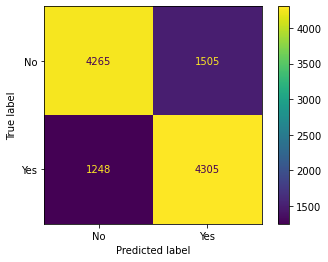

In [ ]:
plot_confusion_matrix(grid,X_test,y_test)

In [ ]:

modelT= DecisionTreeClassifier(max_depth=6,criterion='gini',splitter='best')
modelT.fit(X_train,y_train)
predT= modelT.predict(X_test)
print(classification_report(y_test,predT))

              precision    recall  f1-score   support

          No       0.77      0.74      0.76      5770
         Yes       0.74      0.78      0.76      5553

    accuracy                           0.76     11323
   macro avg       0.76      0.76      0.76     11323
weighted avg       0.76      0.76      0.76     11323



In [ ]:
modelT.feature_importances_
pd.DataFrame(index=X.columns,data=modelT.feature_importances_,columns=['Feature Importance'])

,Feature Importance
BMI,0.001170
Smoking,0.001500
AlcoholDrinking,0.000000
Stroke,0.046845
PhysicalHealth,0.000234
MentalHealth,0.000047
DiffWalking,0.008083
Sex,0.059577
AgeCategory,0.558306
Race,0.001117


In [ ]:
from sklearn.tree import plot_tree

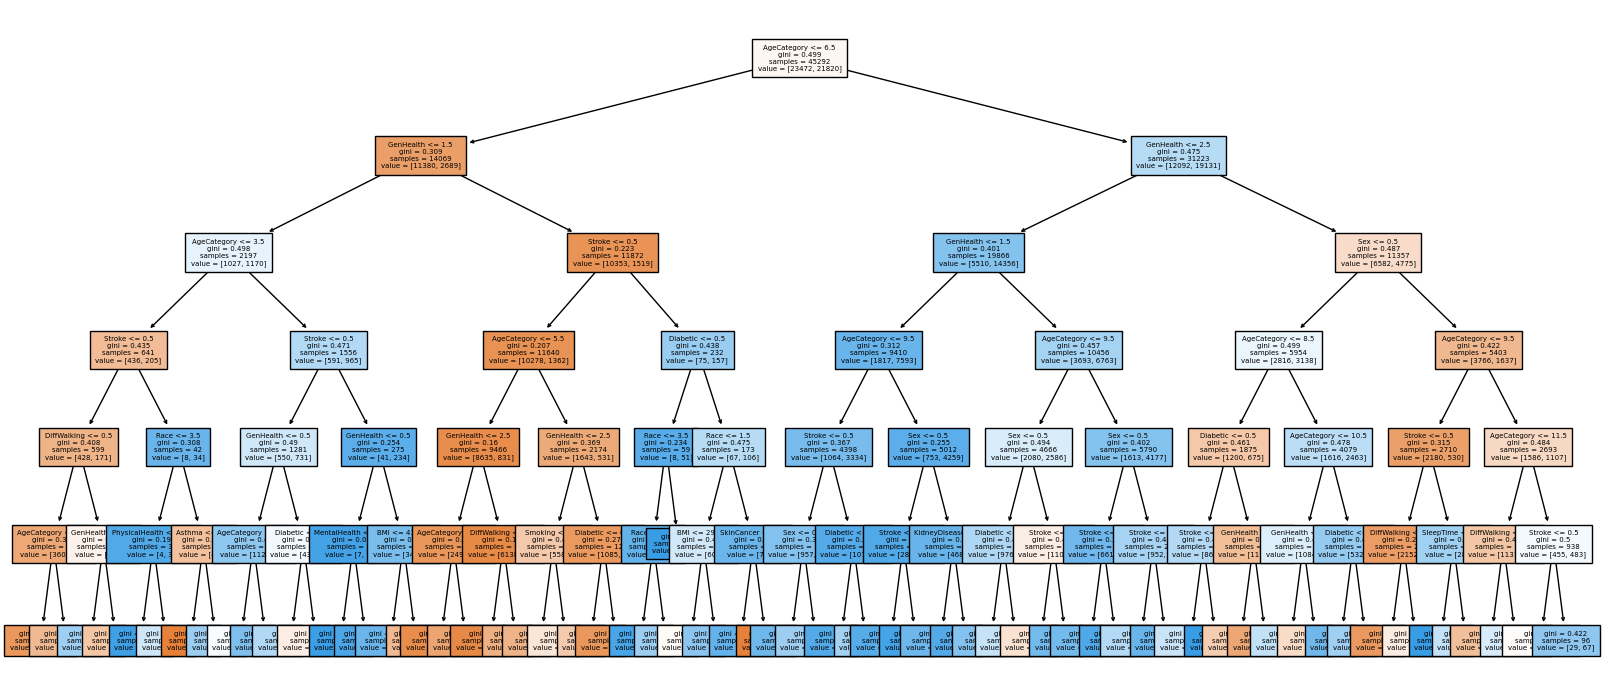

In [ ]:
plt.figure(figsize=(20,9),dpi=100)
plot_tree(modelT,filled=True,feature_names=X.columns,fontsize=5);

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators=[30,64,100,128,200]
max_features= [2,3,4,6,10]
max_depth= [2,3,4,6,10]
criterion =["gini", "entropy"]


In [ ]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'criterion':criterion,}  

In [ ]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [ ]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [ ]:

grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'n_estimators': 128}

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.80      0.74      0.77      5770
         Yes       0.75      0.81      0.78      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0.77      0.77      0.77     11323



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


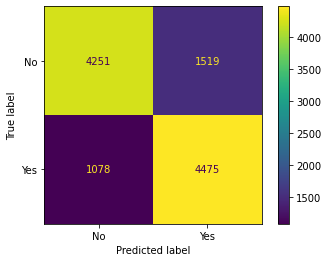

In [ ]:
plot_confusion_matrix(grid,X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
errors = []
misclassifications = []

for n in range(1,128):
    rfc = RandomForestClassifier( n_estimators=n,max_depth=10,max_features= 4,criterion= 'gini')
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

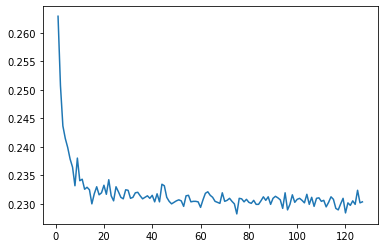

In [ ]:
plt.plot(range(1,128),errors)

In [ ]:
rfc30 = RandomForestClassifier( n_estimators=30,max_depth=10,max_features= 4,criterion= 'gini')
rfc30.fit(X_train,y_train)
preds1 = rfc30.predict(X_test)

In [ ]:
rfc40 = RandomForestClassifier( n_estimators=40,max_depth=10,max_features= 4,criterion= 'gini')
rfc40.fit(X_train,y_train)
preds2 = rfc40.predict(X_test)

In [ ]:
rfc80 = RandomForestClassifier( n_estimators=80,max_depth=10,max_features= 4,criterion= 'gini')
rfc80.fit(X_train,y_train)
preds3 = rfc80.predict(X_test)

In [ ]:
rfc128 = RandomForestClassifier( n_estimators=128,max_depth=10,max_features= 4,criterion= 'gini')
rfc128.fit(X_train,y_train)
preds4 = rfc128.predict(X_test)

In [ ]:
print('n_estimators = 30',classification_report(y_test,preds1))
print('n_estimators = 40',classification_report(y_test,preds2))
print('n_estimators = 80',classification_report(y_test,preds3))
print('n_estimators = 128',classification_report(y_test,preds4))

n_estimators = 30               precision    recall  f1-score   support

          No       0.79      0.73      0.76      5770
         Yes       0.74      0.80      0.77      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0.77      0.77      0.77     11323

n_estimators = 40               precision    recall  f1-score   support

          No       0.80      0.74      0.76      5770
         Yes       0.74      0.80      0.77      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0.77      0.77      0.77     11323

n_estimators = 80               precision    recall  f1-score   support

          No       0.79      0.74      0.76      5770
         Yes       0.75      0.80      0.77      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


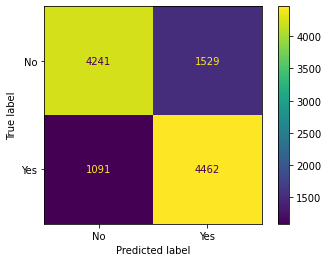

In [ ]:
plot_confusion_matrix(rfc40,X_test,y_test)

SVM

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [ ]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [ ]:

grid.fit(X_train,y_train)
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:

grid.best_score_

0.7608409223594955

In [ ]:
grid_pred = grid.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


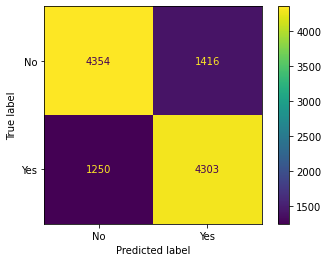

In [ ]:
plot_confusion_matrix(grid,X_test,y_test)

In [ ]:
print('C:1 Kernel: Linear',classification_report(y_test,grid_pred))

C:1 Kernel: Linear               precision    recall  f1-score   support

          No       0.78      0.75      0.77      5770
         Yes       0.75      0.77      0.76      5553

    accuracy                           0.76     11323
   macro avg       0.76      0.76      0.76     11323
weighted avg       0.76      0.76      0.76     11323



boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [ ]:
gb_model = GradientBoostingClassifier()

In [ ]:
grid = GridSearchCV(gb_model,param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [ ]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
predictions

array(['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.79      0.74      0.77      5770
         Yes       0.75      0.80      0.77      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0.77      0.77      0.77     11323



In [ ]:
grid.best_estimator_.feature_importances_

array([0.02670566, 0.01535035, 0.00172223, 0.04672576, 0.01234102,
       0.00629226, 0.03238834, 0.05490304, 0.48879985, 0.00809579,
       0.03427523, 0.00128785, 0.24801165, 0.00976003, 0.00396728,
       0.00763719, 0.00173647])

In [ ]:
feat_import = grid.best_estimator_.feature_importances_

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [ ]:
imp_feats

,Importance
BMI,0.026706
Smoking,0.015350
AlcoholDrinking,0.001722
Stroke,0.046726
PhysicalHealth,0.012341
MentalHealth,0.006292
DiffWalking,0.032388
Sex,0.054903
AgeCategory,0.488800
Race,0.008096


In [ ]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
AgeCategory,0.488800
GenHealth,0.248012
Sex,0.054903
Stroke,0.046726
Diabetic,0.034275
DiffWalking,0.032388
BMI,0.026706
Smoking,0.015350
PhysicalHealth,0.012341
SleepTime,0.009760


In [ ]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,17.0,0.058824,0.125104,0.001288,0.006292,0.012341,0.034275,0.4888


In [ ]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [ ]:
imp_feats.sort_values('Importance')

,Importance
PhysicalActivity,0.001288
AlcoholDrinking,0.001722
SkinCancer,0.001736
Asthma,0.003967
MentalHealth,0.006292
KidneyDisease,0.007637
Race,0.008096
SleepTime,0.009760
PhysicalHealth,0.012341
Smoking,0.015350


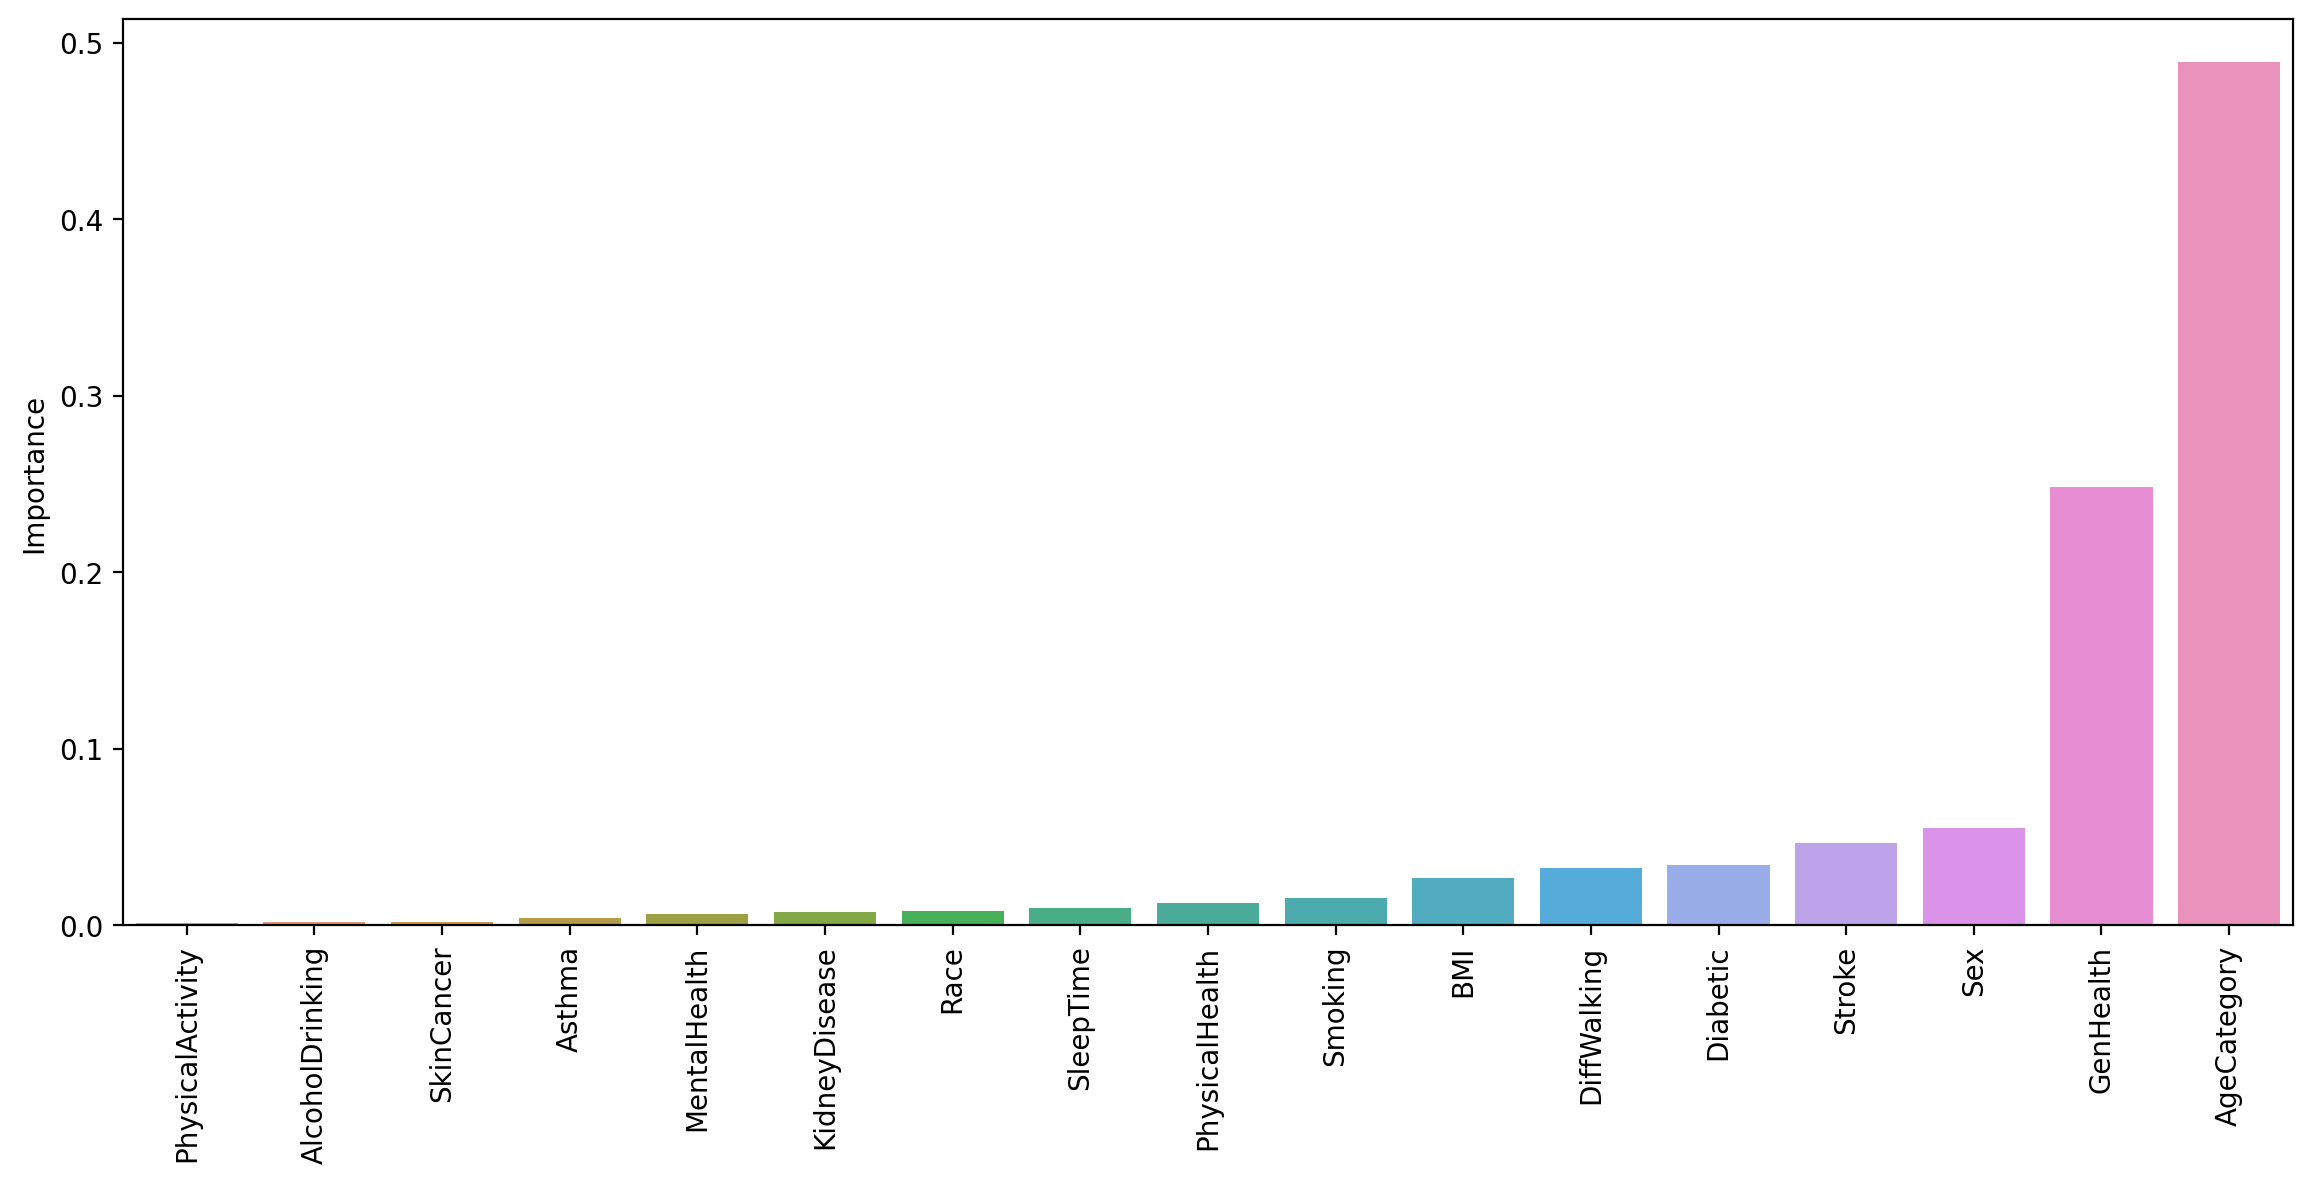

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
errorsB = []
misclassificationsB = []

for n in range(1,100):
    bost = GradientBoostingClassifier( n_estimators=n,max_depth= 5)
    bost.fit(X_train,y_train)
    predb = bost.predict(X_test)
    errb = 1 - accuracy_score(predb,y_test)
    n_missedb = np.sum(predb != y_test) # watch the video to understand this line!!
    errorsB.append(errb)
    misclassificationsB.append(n_missedb)

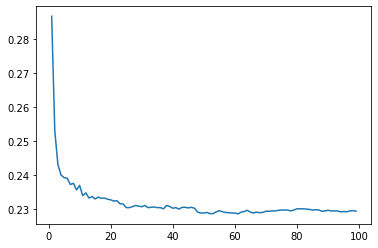

In [ ]:
plt.plot(range(1,100),errorsB)

In [ ]:
rfc30 = GradientBoostingClassifier( n_estimators=30,max_depth= 5)
rfc30.fit(X_train,y_train)
preds1 = rfc30.predict(X_test)

In [ ]:
rfc80 = GradientBoostingClassifier( n_estimators=50,max_depth= 5)
rfc80.fit(X_train,y_train)
preds3 = rfc80.predict(X_test)

In [ ]:
rfc128 = GradientBoostingClassifier( n_estimators=100,max_depth= 5)
rfc128.fit(X_train,y_train)
preds4 = rfc128.predict(X_test)

In [ ]:
print('n_estimators = 30',classification_report(y_test,preds1))

print('n_estimators = 50',classification_report(y_test,preds3))
print('n_estimators = 100',classification_report(y_test,preds4))

n_estimators = 30               precision    recall  f1-score   support

          No       0.80      0.74      0.76      5770
         Yes       0.75      0.80      0.77      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0.77      0.77      0.77     11323

n_estimators = 50               precision    recall  f1-score   support

          No       0.79      0.74      0.77      5770
         Yes       0.75      0.80      0.77      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0.77      0.77      0.77     11323

n_estimators = 100               precision    recall  f1-score   support

          No       0.79      0.74      0.77      5770
         Yes       0.75      0.80      0.77      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       

DEEP LEARNING


In [ ]:
#estructura 1
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def deep_model():

	model = Sequential()
	model.add(Dense(10, input_dim=17, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))

	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=deep_model, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [50, 75, 100,120]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.762188 using {'batch_size': 20, 'epochs': 75}
0.759008 (0.002907) with: {'batch_size': 10, 'epochs': 50}
0.759097 (0.004180) with: {'batch_size': 10, 'epochs': 75}
0.759825 (0.004321) with: {'batch_size': 10, 'epochs': 100}
0.762099 (0.003509) with: {'batch_size': 10, 'epochs': 120}
0.757330 (0.005048) with: {'batch_size': 20, 'epochs': 50}
0.762188 (0.004462) with: {'batch_size': 20, 'epochs': 75}
0.760532 (0.004191) with: {'batch_size': 20, 'epochs': 100}
0.761393 (0.003839) with: {'batch_size': 20, 'epochs': 120}
0.761062 (0.003941) with: {'batch_size': 40, 'epochs': 50}
0.757882 (0.001462) with: {'batch_size': 40, 'epochs': 75}
0.760863 (0.001168) with: {'batch_size': 40, 'epochs': 100}
0.760554 (0.003869) with: {'batch_size': 40, 'epochs': 120}
0.760333 (0.005594) with: {'batch_size': 60, 'epochs': 50}
0.757485 (0.008779) with: {'batch_size': 60, 'epochs': 75}
0.761481 (0.004284) with: {'batch_size': 60, 'epochs': 100}
0.760929 (0.004615) with: {'batch_size': 60, 'epochs':

In [ ]:
#estructura 1
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def deep_model():

	model = Sequential()
	model.add(Dense(10, input_dim=17, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))

	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = KerasClassifier(build_fn=deep_model, verbose=0)

model.fit(X_train, y_train,epochs=90,batch_size= 20)
predrn= model.predict(X_test)
print(classification_report(y_test,predrn))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


              precision    recall  f1-score   support

          No       0.80      0.74      0.77      5770
         Yes       0.75      0.81      0.78      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0.77      0.77      0.77     11323



In [ ]:
print('epochs=90 batch_size= 20',classification_report(y_test,predrn))

epochs=90 batch_size= 20               precision    recall  f1-score   support

          No       0.80      0.74      0.77      5770
         Yes       0.75      0.81      0.78      5553

    accuracy                           0.77     11323
   macro avg       0.77      0.77      0.77     11323
weighted avg       0.77      0.77      0.77     11323



COMPARATIVA


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20,)
knn.fit(X_train,y_train)
k20= knn.predict(X_test)

In [ ]:
svm= SVC(C = 1,kernel = 'linear')
svm.fit(X_train,y_train)
pred2= svm.predict(X_test)

In [ ]:

modelT= DecisionTreeClassifier(max_depth=6,criterion='gini',splitter='best')
modelT.fit(X_train,y_train)
predT= modelT.predict(X_test)


In [ ]:
rfc = RandomForestClassifier(criterion='gini',max_depth=10,max_features=4,n_estimators= 40)
rfc.fit(X_train,y_train)
pred3= rfc.predict(X_test)

In [ ]:
bt = GradientBoostingClassifier( n_estimators=30,max_depth= 5)
bt.fit(X_train,y_train)
preds1 = bt.predict(X_test)

In [ ]:
print('KNN:',classification_report(y_test,k20))
print('SVM:',classification_report(y_test,pred2))
print('Tree:',classification_report(y_test,predT))
print('RF:',classification_report(y_test,pred3))
print('BC:',classification_report(y_test,preds1))
print('RN:',classification_report(y_test,predrn))

KNN:               precision    recall  f1-score   support

          No       0.74      0.75      0.75      5770
         Yes       0.74      0.73      0.73      5553

    accuracy                           0.74     11323
   macro avg       0.74      0.74      0.74     11323
weighted avg       0.74      0.74      0.74     11323

SVM:               precision    recall  f1-score   support

          No       0.78      0.75      0.77      5770
         Yes       0.75      0.77      0.76      5553

    accuracy                           0.76     11323
   macro avg       0.76      0.76      0.76     11323
weighted avg       0.76      0.76      0.76     11323

Tree:               precision    recall  f1-score   support

          No       0.77      0.74      0.76      5770
         Yes       0.74      0.78      0.76      5553

    accuracy                           0.76     11323
   macro avg       0.76      0.76      0.76     11323
weighted avg       0.76      0.76      0.76     11323

RF:

NameError: ignored

KNN


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


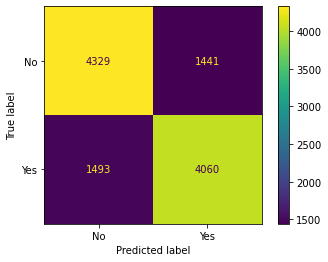

In [ ]:
print('KNN')
plot_confusion_matrix(knn,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


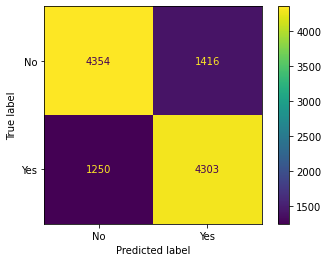

In [ ]:

plot_confusion_matrix(svm,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


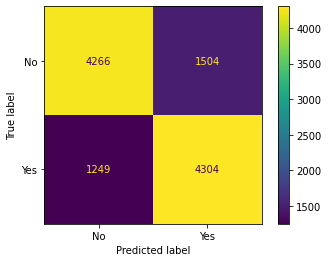

In [ ]:
plot_confusion_matrix(modelT,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


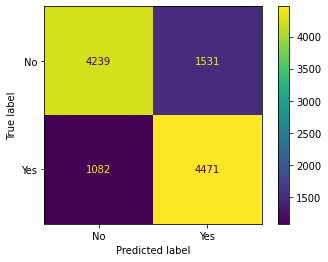

In [ ]:
plot_confusion_matrix(rfc,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


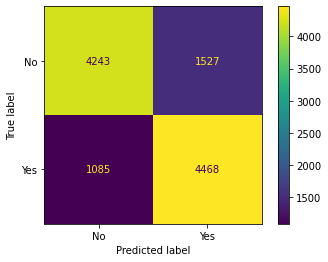

In [ ]:
plot_confusion_matrix(bt,X_test,y_test)

In [ ]:
cf_matrix = confusion_matrix(y_true=y_test,y_pred=predrn)
confusion_matrix(y_true=y_test,y_pred=predrn)

array([[4260, 1510],
       [1063, 4490]])

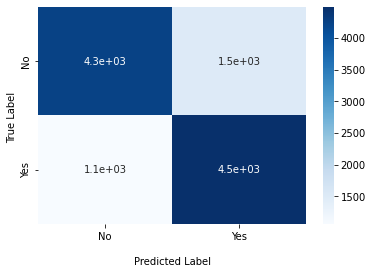

In [ ]:

import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Label')
ax.set_ylabel('True Label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

## Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
rfc.feature_importances_
rft=pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Importance'])
rft

,Importance
BMI,0.034470
Smoking,0.024363
AlcoholDrinking,0.003356
Stroke,0.055573
PhysicalHealth,0.046164
MentalHealth,0.016275
DiffWalking,0.066300
Sex,0.041686
AgeCategory,0.335872
Race,0.014925


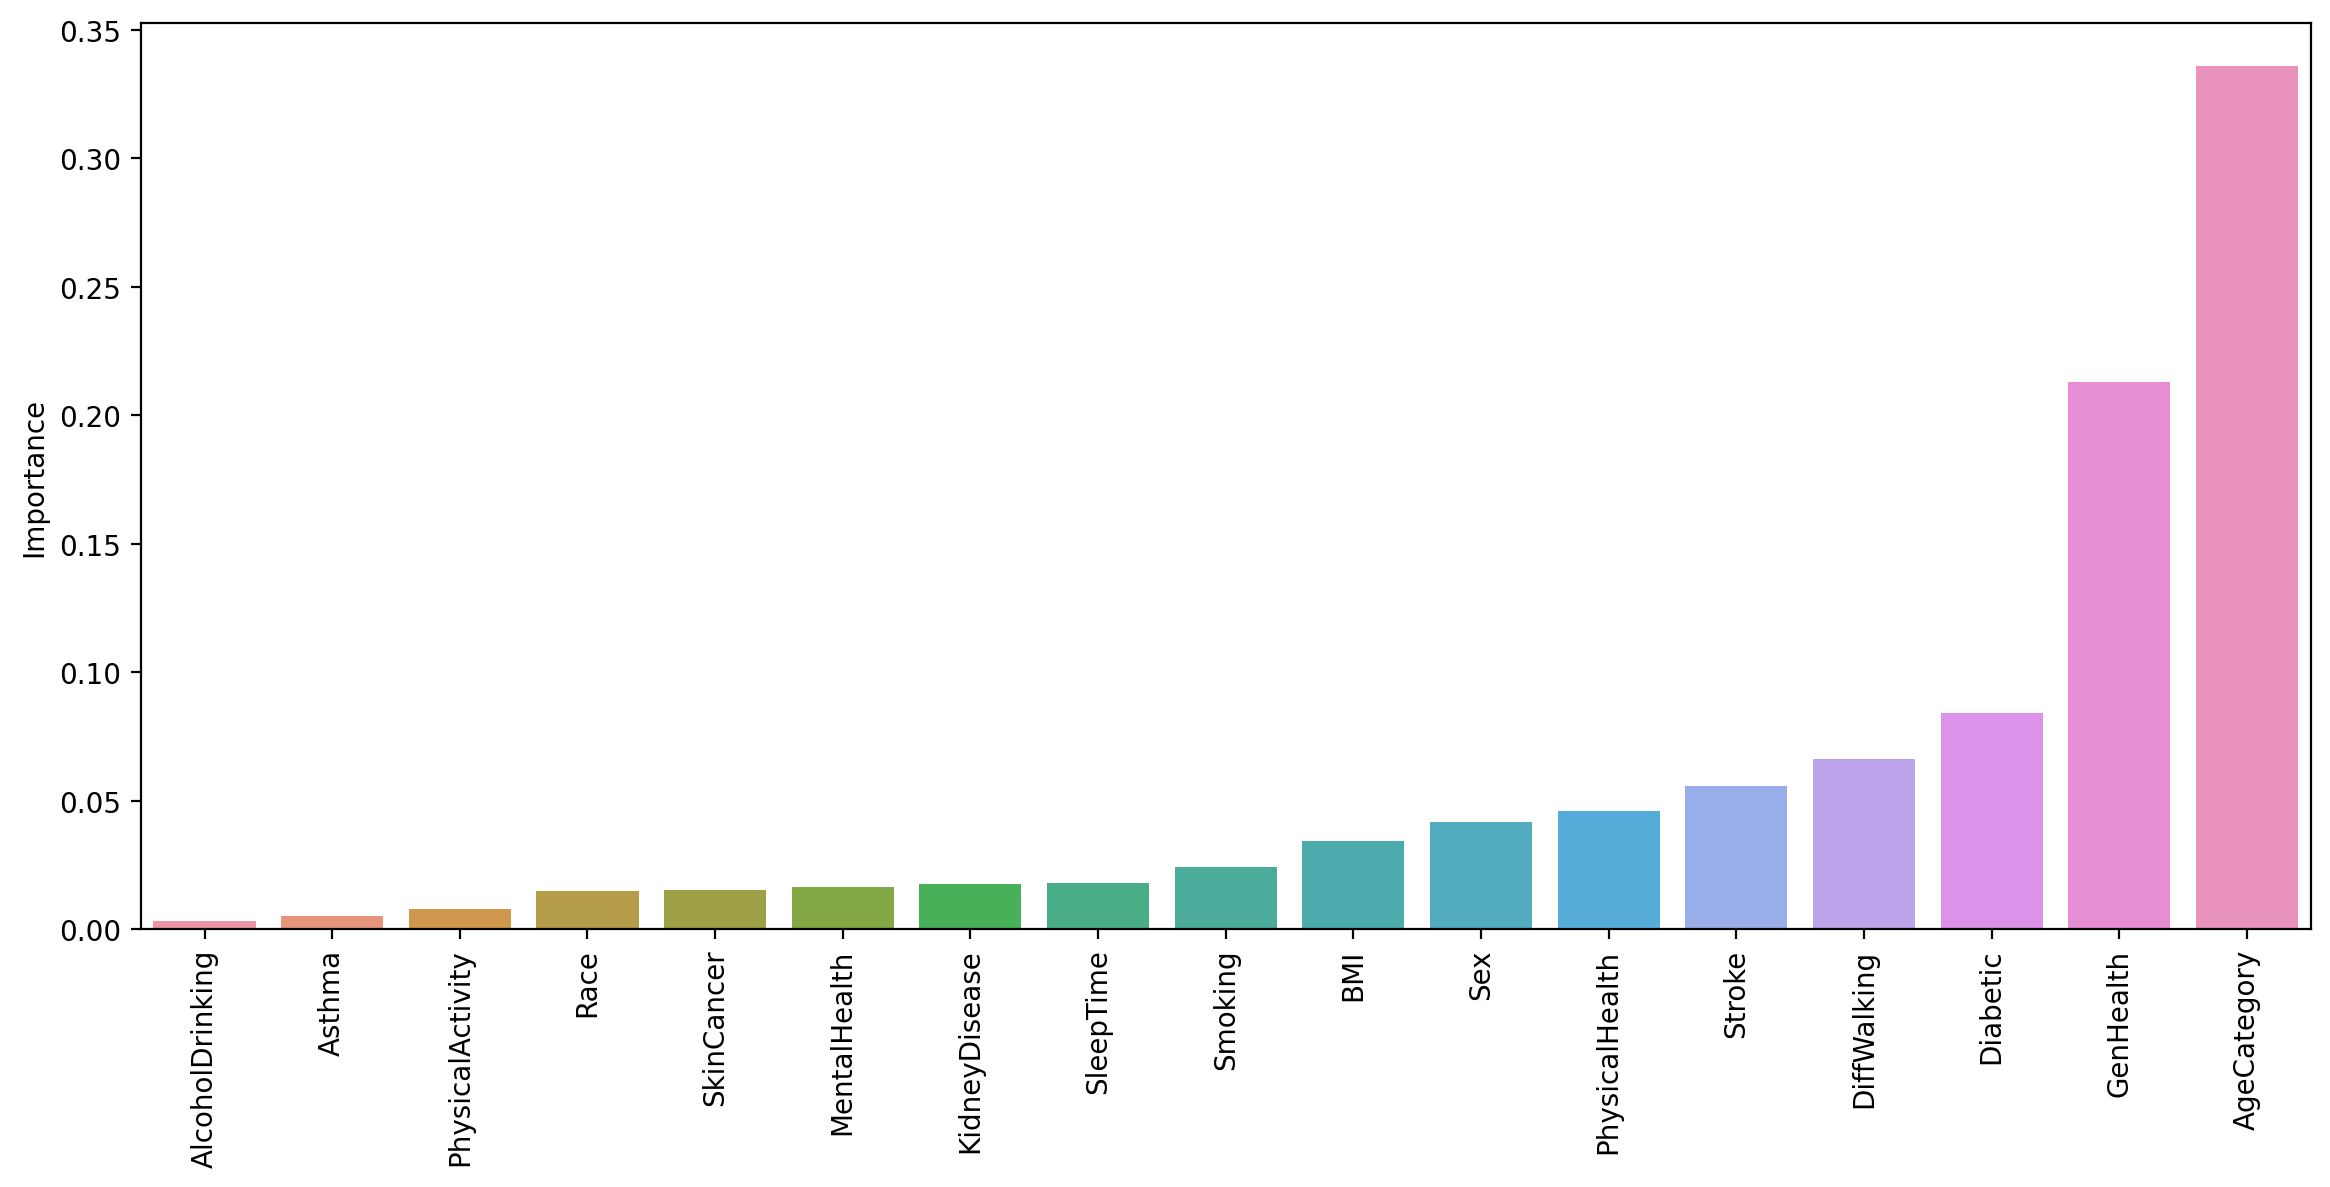

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=rft.sort_values('Importance'),x=rft.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
modelT.feature_importances_
mtf= pd.DataFrame(index=X.columns,data=modelT.feature_importances_,columns=['Importance'])
mtf

,Importance
BMI,0.001170
Smoking,0.001500
AlcoholDrinking,0.000000
Stroke,0.046845
PhysicalHealth,0.000234
MentalHealth,0.000047
DiffWalking,0.008083
Sex,0.059577
AgeCategory,0.558306
Race,0.001117


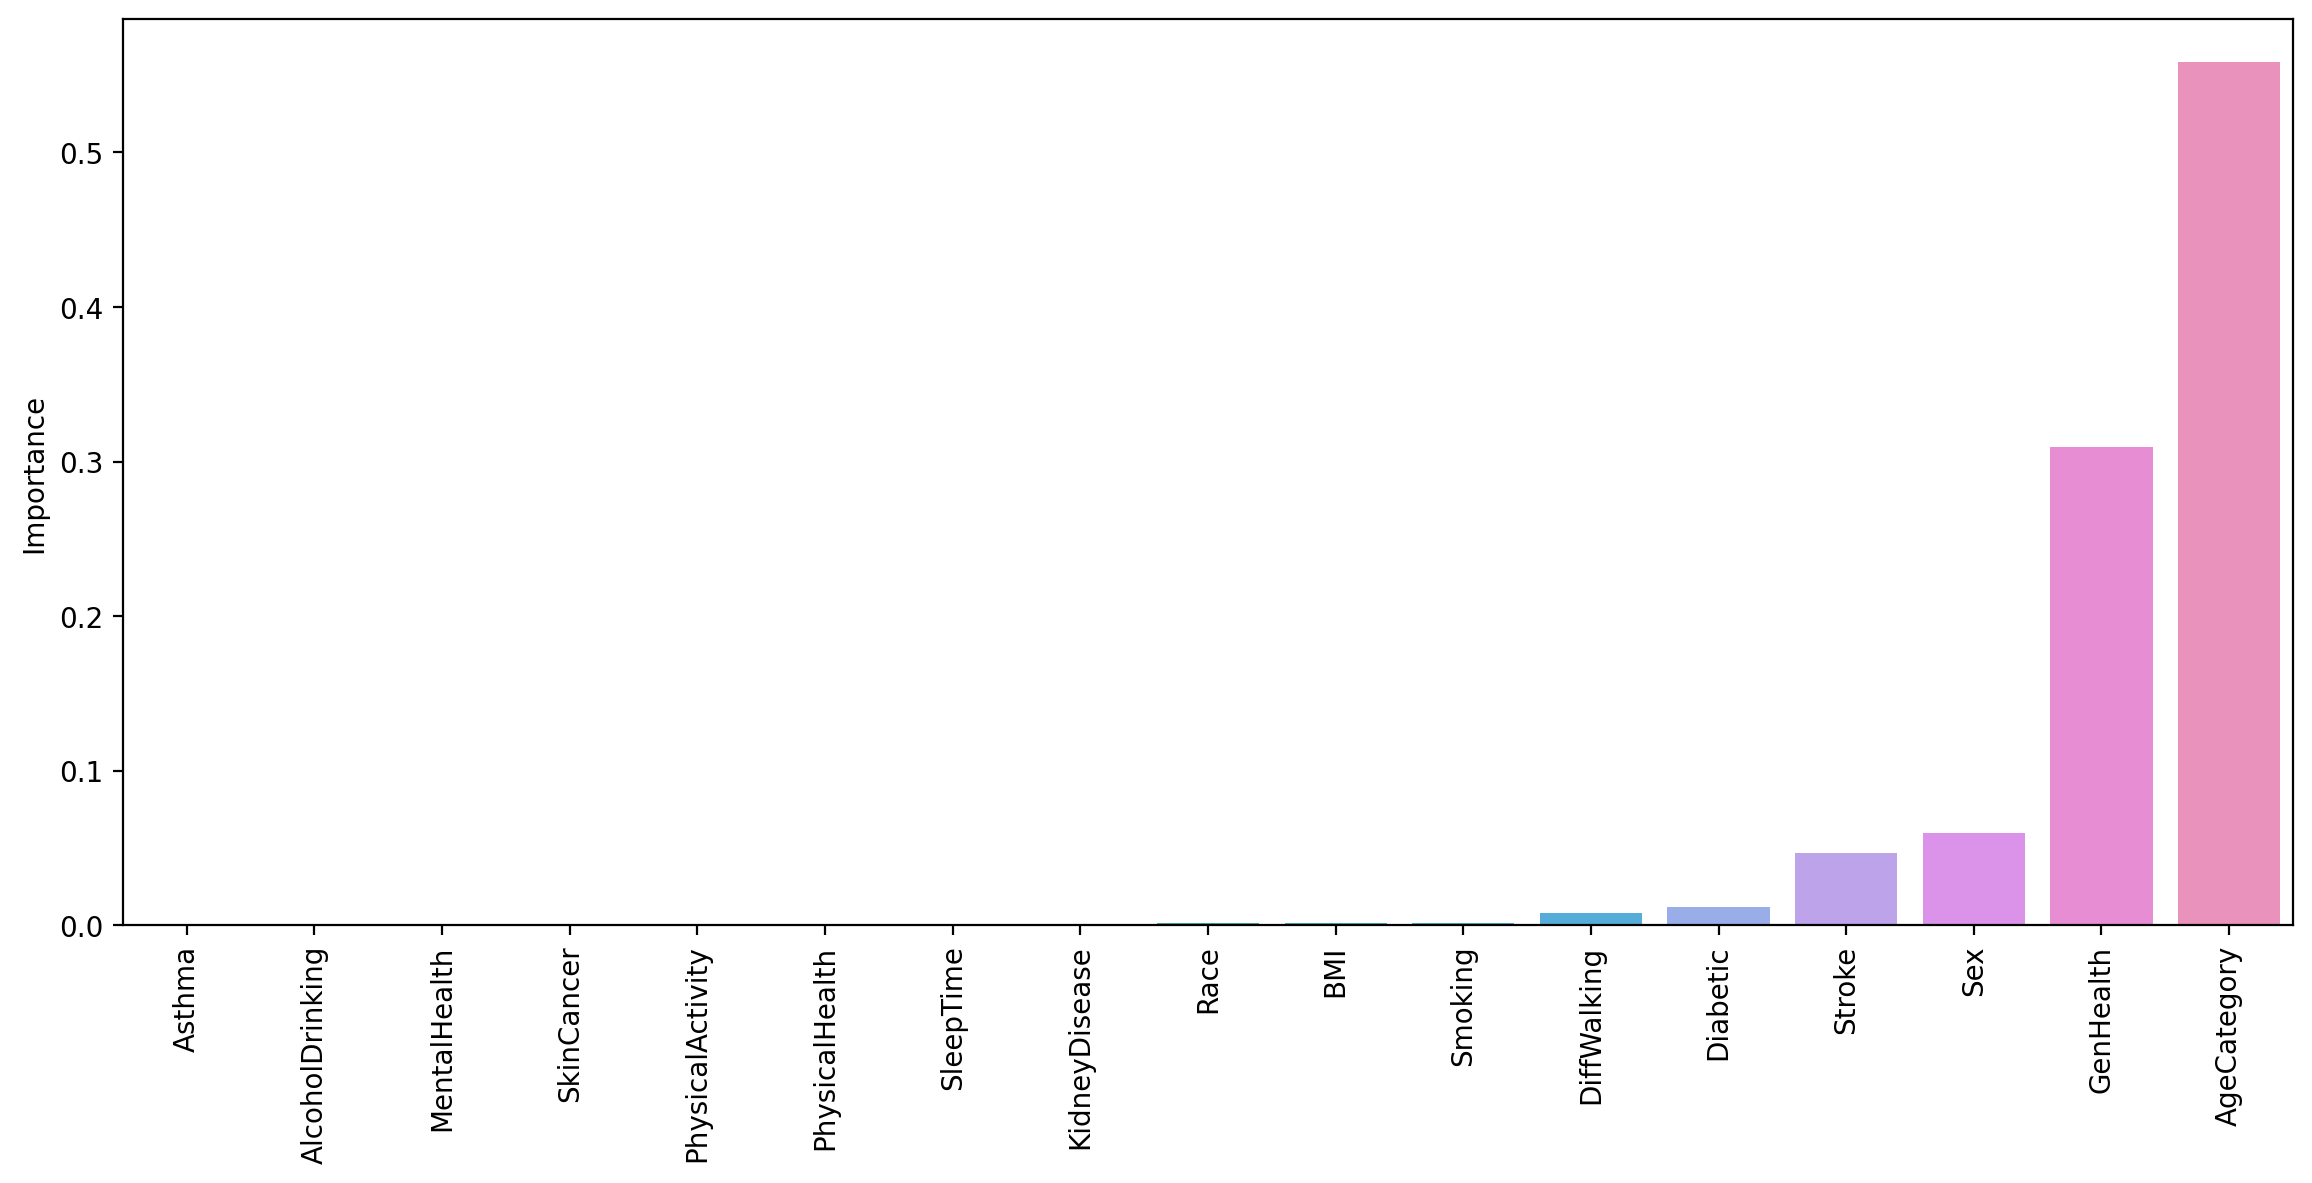

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=mtf.sort_values('Importance'),x=mtf.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [ ]:
bt.feature_importances_
btf= pd.DataFrame(index=X.columns,data=bt.feature_importances_,columns=['Importance'])
btf

,Importance
BMI,0.008454
Smoking,0.014533
AlcoholDrinking,0.000518
Stroke,0.048213
PhysicalHealth,0.008361
MentalHealth,0.002037
DiffWalking,0.032957
Sex,0.056324
AgeCategory,0.515801
Race,0.004148
